In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("dataset.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
show_id         7787 non-null object
type            7787 non-null object
title           7787 non-null object
director        5398 non-null object
cast            7069 non-null object
country         7280 non-null object
date_added      7777 non-null object
release_year    7787 non-null int64
rating          7780 non-null object
duration        7787 non-null object
listed_in       7787 non-null object
description     7787 non-null object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [4]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Text(0.5, 1.0, 'COLUMN WISE MISSING VALUES')

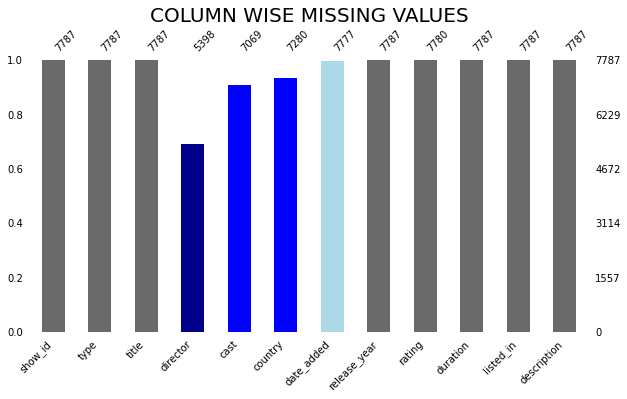

In [5]:

import missingno 
color= ['dimgrey','dimgrey','dimgrey','darkblue','blue','blue','lightblue','dimgrey','dimgrey','dimgrey','dimgrey','dimgrey']
missingno.bar(df,fontsize=10,color=color,figsize=(10,5))
plt.title('COLUMN WISE MISSING VALUES',fontsize=20)

In [6]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['country'].mode()[0])

In [7]:
df = df.dropna( how='any',subset=['cast', 'director'])

In [8]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:

df = df.rename(columns={"listed_in":"Genre"})
df['Genre'] = df['Genre'].apply(lambda x: x.split(",")[0])
df['Genre'].head()

1                    Dramas
2             Horror Movies
3        Action & Adventure
4                    Dramas
5    International TV Shows
Name: Genre, dtype: object

In [11]:
df['year_add'] = df['date_added'].apply(lambda x: x.split(" ")[-1])
df['year_add'].head()

1    2016
2    2018
3    2017
4    2020
5    2017
Name: year_add, dtype: object

In [12]:
df['month_add'] = df['date_added'].apply(lambda x: x.split(" ")[0])
df['month_add'].head()

1    December
2    December
3    November
4     January
5        July
Name: month_add, dtype: object

In [13]:
df['country_main'] = df['country'].apply(lambda x: x.split(",")[0])
df['country_main'].head()

1           Mexico
2        Singapore
3    United States
4    United States
5           Turkey
Name: country_main, dtype: object

In [14]:
df['type'].value_counts()

Movie      4834
TV Show     145
Name: type, dtype: int64

In [15]:
df['rating'].value_counts()

TV-MA            1724
TV-14            1183
R                 656
TV-PG             426
PG-13             378
PG                241
TV-Y               90
TV-G               85
TV-Y7              82
NR                 62
G                  38
UR                  5
United States       4
TV-Y7-FV            3
NC-17               2
Name: rating, dtype: int64

In [16]:
movie_df = df[df['type'] == 'Movie']
tv_df = df[df['type'] == 'TV Show']

In [17]:
movie_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,year_add,month_add,country_main
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,Dramas,After a devastating earthquake hits Mexico Cit...,2016,December,Mexico
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,Horror Movies,"When an army recruit is found dead, his fellow...",2018,December,Singapore
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",2017,November,United States
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January,United States
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,Horror Movies,"After an awful accident, a couple admitted to ...",2020,June,Egypt


<AxesSubplot:xlabel='type', ylabel='count'>

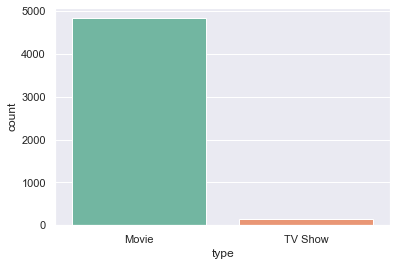

In [18]:
sb.set(style="darkgrid")
sb.countplot(x="type", data= df, palette="Set2")

<AxesSubplot:xlabel='rating', ylabel='count'>

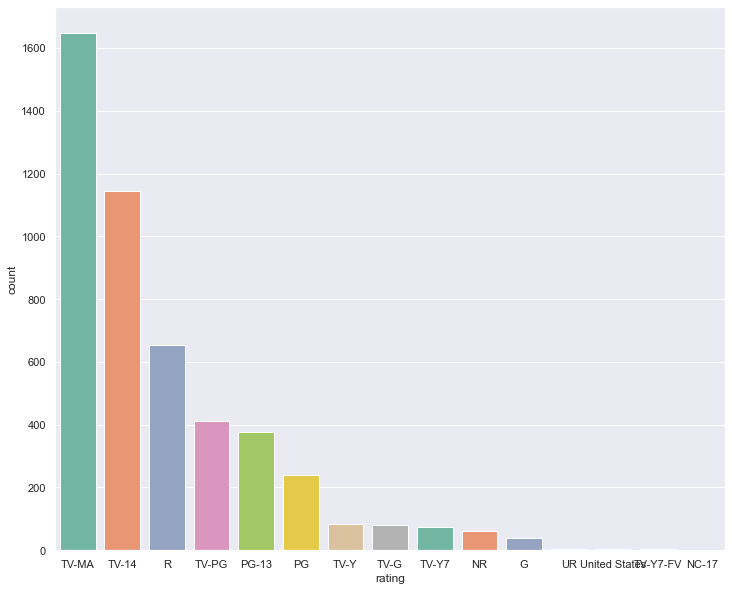

In [19]:

plt.figure(figsize=(12,10))
sb.set(style="darkgrid")
sb.countplot(x="rating", data= movie_df, palette="Set2", order=movie_df['rating'].value_counts().index[0:15])

<AxesSubplot:xlabel='rating', ylabel='count'>

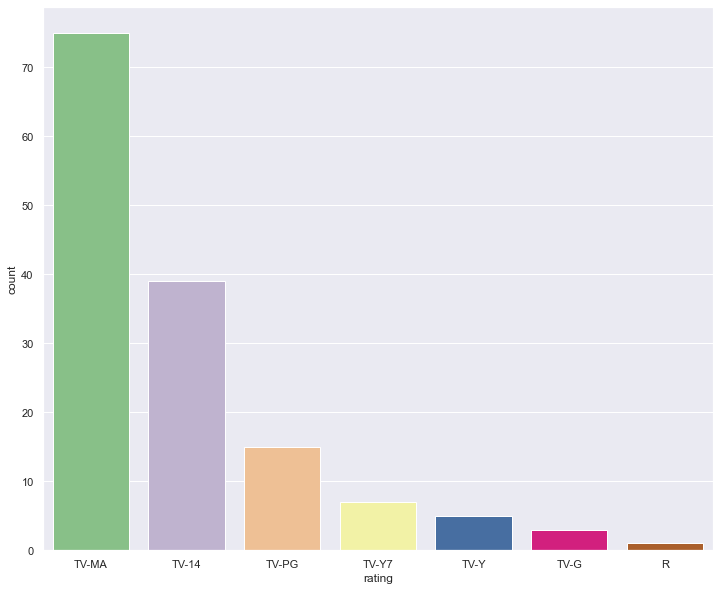

In [20]:

plt.figure(figsize=(12,10))
sb.set(style="darkgrid")
sb.countplot(x="rating", data=tv_df, palette="Accent", order=tv_df['rating'].value_counts().index[0:15])

<AxesSubplot:xlabel='count', ylabel='release_year'>

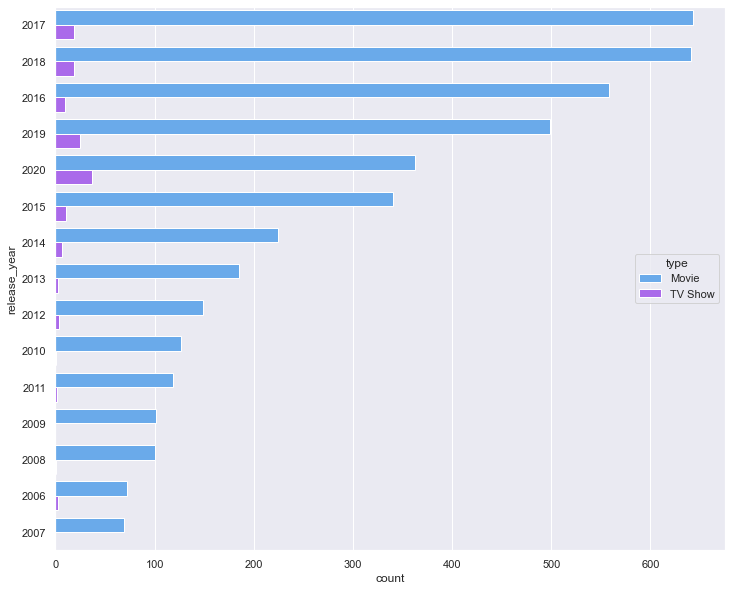

In [21]:
plt.figure(figsize=(12,10))
sb.set(style="darkgrid")
sb.countplot(y="release_year", data= df, palette="cool", order= df['release_year'].value_counts().index[0:15],hue=df['type'])

In [22]:
movie_df['duration']=movie_df['duration'].str.replace(' min','')
movie_df['duration']=movie_df['duration'].astype(str).astype(int)
movie_df['duration']

1        93
2        78
3        80
4       123
6        95
       ... 
7778     88
7780     94
7781     88
7782     99
7783    111
Name: duration, Length: 4834, dtype: int32

<AxesSubplot:xlabel='duration', ylabel='Density'>

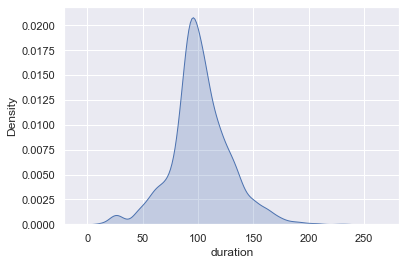

In [23]:
sb.set(style="darkgrid")
sb.kdeplot(data=movie_df['duration'], shade=True)

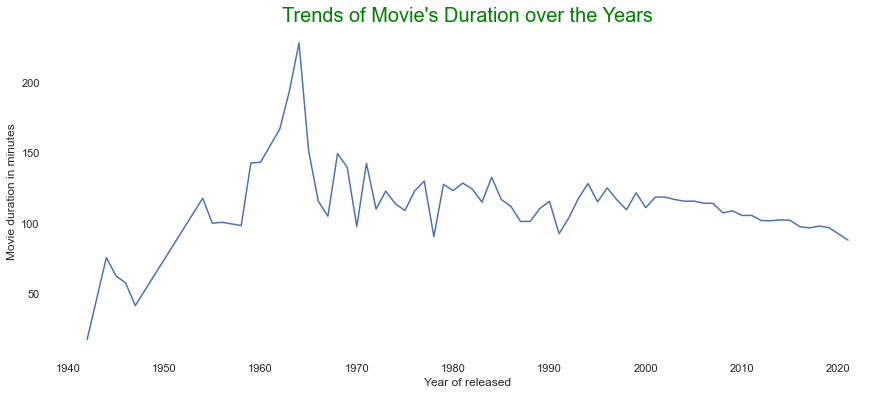

In [24]:
duration_year = movie_df.groupby(['release_year']).mean()
duration_year = duration_year.sort_index()

plt.figure(figsize=(15,6))
sb.lineplot(x=duration_year.index, y=duration_year.duration.values)
plt.box(on=None)
plt.ylabel('Movie duration in minutes');
plt.xlabel('Year of released');
plt.title("Trends of Movie's Duration over the Years", fontsize=20, color='Green');

In [25]:
tv_df['duration']=tv_df['duration'].str.replace(' Season','')
tv_df['duration']=tv_df['duration'].str.replace('s','')
tv_df['duration']=tv_df['duration'].astype(str).astype(int)
tv_df['duration']

5       1
132     1
218     1
260     1
276     1
       ..
7385    1
7400    4
7492    1
7666    2
7721    2
Name: duration, Length: 145, dtype: int32

--> Extract TV Shows titles and its number of seasons:

In [26]:

columns=['title','duration']
tv_shows = tv_df[columns]

In [27]:

tv_shows = tv_shows.sort_values(by='duration',ascending=False)
tv_shows
top20 = tv_shows[0:20]
top20

,title,duration
5912,Supernatural,15
4404,Naruto,9
1181,Call the Midwife,9
584,Arrow,8
6415,The Great British Baking Show,8
5291,Royal Pains,8
6359,The Flash,6
2130,Father Brown,6
1470,Comedians in Cars Getting Coffee,6
2313,Fullmetal Alchemist: Brotherhood,5


<AxesSubplot:xlabel='title'>

<Figure size 720x432 with 0 Axes>

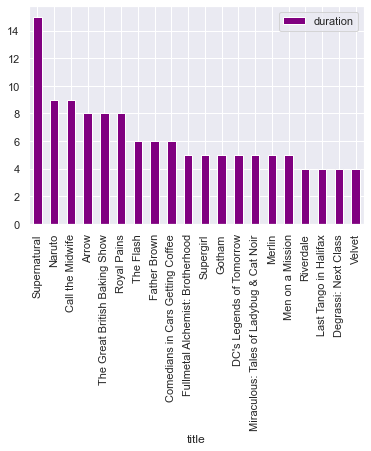

In [28]:
plt.figure(figsize=(10,6))
top20.plot(kind='bar',x='title',y='duration', color='purple')

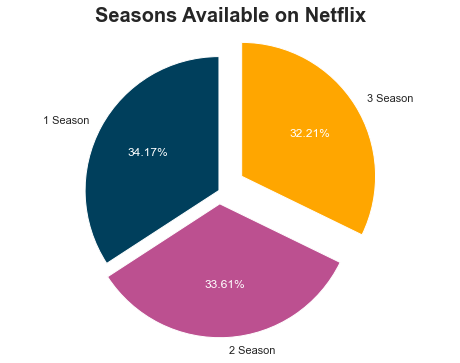

In [29]:

plt.figure(figsize=(8, 6))
labels=['1 Season', '2 Season', '3 Season']
_, _, texts = plt.pie(df.duration.value_counts()[:3], labels=labels, autopct='%1.2f%%', startangle=90, 
                      explode=(0.0, 0.1, 0.2), colors=['#003f5c', '#bc5090', '#ffa600'])
plt.axis('equal')
plt.title('Seasons Available on Netflix', fontsize=20, fontweight='bold');
for text in texts:
    text.set_color('white')

<AxesSubplot:xlabel='country_main', ylabel='count'>

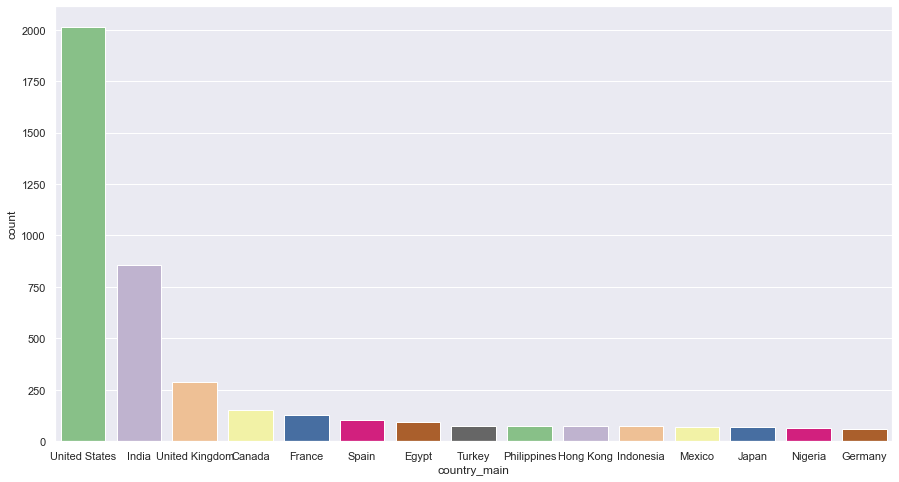

In [30]:
plt.figure(figsize=(15,8))
sb.set(style="darkgrid")
sb.countplot(x="country_main", data=movie_df, palette="Accent", order=movie_df['country_main'].value_counts().index[0:15])

<AxesSubplot:xlabel='country_main', ylabel='count'>

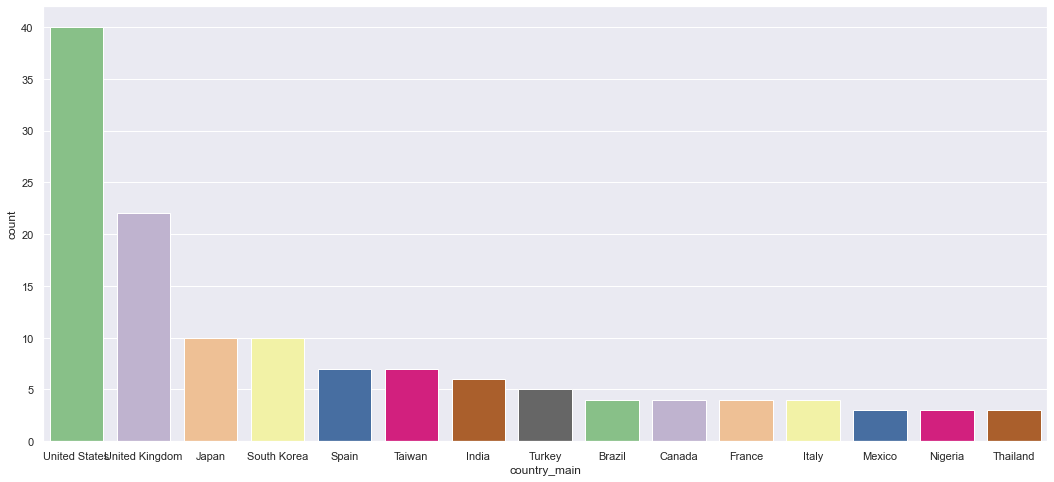

In [31]:
plt.figure(figsize=(18,8))
sb.set(style="darkgrid")
sb.countplot(x="country_main", data=tv_df, palette="Accent", order=tv_df['country_main'].value_counts().index[0:15])

In [32]:

columns=['Genre','country_main']
gen_country = df[columns]

In [33]:
gen_country.head()

,Genre,country_main
1,Dramas,Mexico
2,Horror Movies,Singapore
3,Action & Adventure,United States
4,Dramas,United States
5,International TV Shows,Turkey


In [34]:
gen_country['Genre'].value_counts()

Dramas                          1372
Comedies                        1054
Action & Adventure               711
Children & Family Movies         453
Documentaries                    365
Stand-Up Comedy                  296
Horror Movies                    243
International Movies             109
Classic Movies                    69
Thrillers                         49
International TV Shows            43
Movies                            32
Crime TV Shows                    31
Independent Movies                20
British TV Shows                  20
Anime Features                    18
Music & Musicals                  17
Kids' TV                          11
Cult Movies                       11
Sci-Fi & Fantasy                  11
Anime Series                       9
Docuseries                         9
Stand-Up Comedy & Talk Shows       7
TV Shows                           6
Romantic Movies                    3
TV Comedies                        3
TV Action & Adventure              2
R

In [35]:
size = gen_country['Genre'].value_counts().tolist()
size

[1372,
 1054,
 711,
 453,
 365,
 296,
 243,
 109,
 69,
 49,
 43,
 32,
 31,
 20,
 20,
 18,
 17,
 11,
 11,
 11,
 9,
 9,
 7,
 6,
 3,
 3,
 2,
 1,
 1,
 1,
 1,
 1]

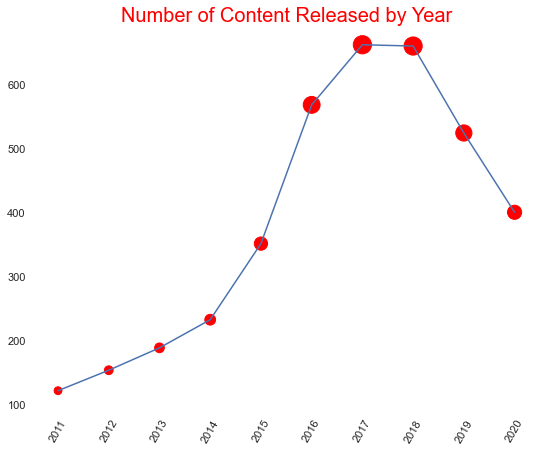

In [36]:
release = df['release_year'].value_counts()
release = release.sort_index(ascending=True)

plt.figure(figsize=(9,7))
plt.plot(release[-11:-1])
plt.scatter(release[-11:-1].index, release[-11:-1].values, s=0.5*release[-11:-1].values, c='Red');
plt.box(on=None);
plt.xticks(rotation = 60)
plt.xticks(release[-11:-1].index);
plt.title('Number of Content Released by Year', color='red', fontsize=20);

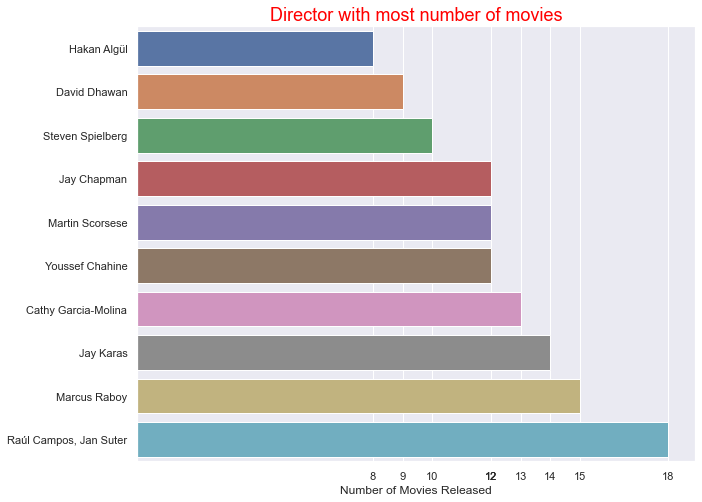

In [37]:
plt.figure(figsize=(10,8))
sb.barplot(y= movie_df.director.value_counts()[:10].sort_values().index, x=movie_df.director.value_counts()[:10].sort_values().values);
plt.title('Director with most number of movies', color='red', fontsize=18)
plt.xticks(movie_df.director.value_counts()[:10].sort_values().values);
plt.xlabel('Number of Movies Released');


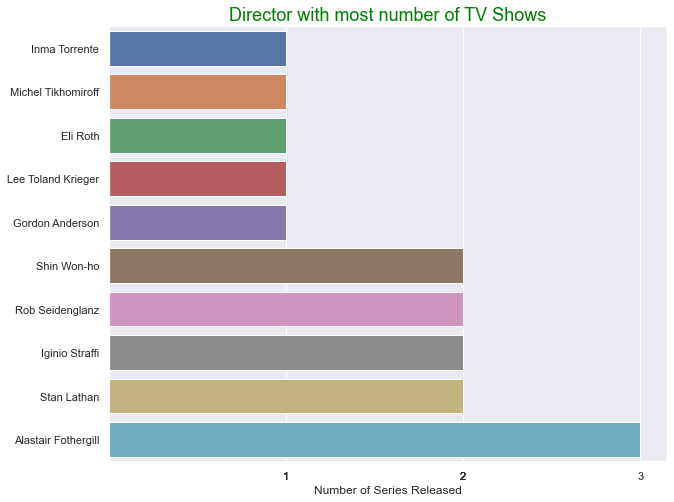

In [38]:
plt.figure(figsize=(10,8))
sb.barplot(y= tv_df.director.value_counts()[:10].sort_values().index, x=tv_df.director.value_counts()[:10].sort_values().values);
plt.title('Director with most number of TV Shows', color='green', fontsize=18)
plt.xticks(tv_df.director.value_counts()[:10].sort_values().values);
plt.xlabel('Number of Series Released');

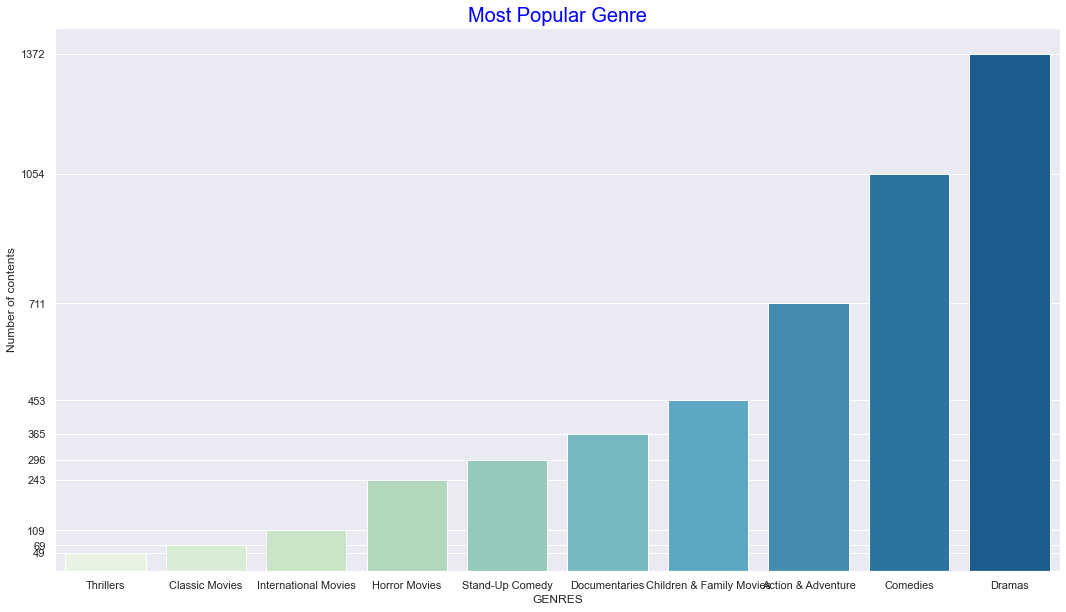

In [39]:
plt.figure(figsize=(18,10))
sb.barplot(x= df.Genre.value_counts()[:10].sort_values().index, y=df.Genre.value_counts()[:10].sort_values().values,palette='GnBu');
plt.title('Most Popular Genre', color='Blue', fontsize=20)
plt.yticks(df.Genre.value_counts()[:10].sort_values().values);
plt.xlabel('GENRES');
plt.ylabel('Number of contents');

In [40]:
df_copy = df.copy()
net_date = df_copy[['date_added']]
net_date['year'] = net_date['date_added'].apply(lambda x : x.split(', ')[-1])
net_date['month'] = net_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df_copy = net_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T


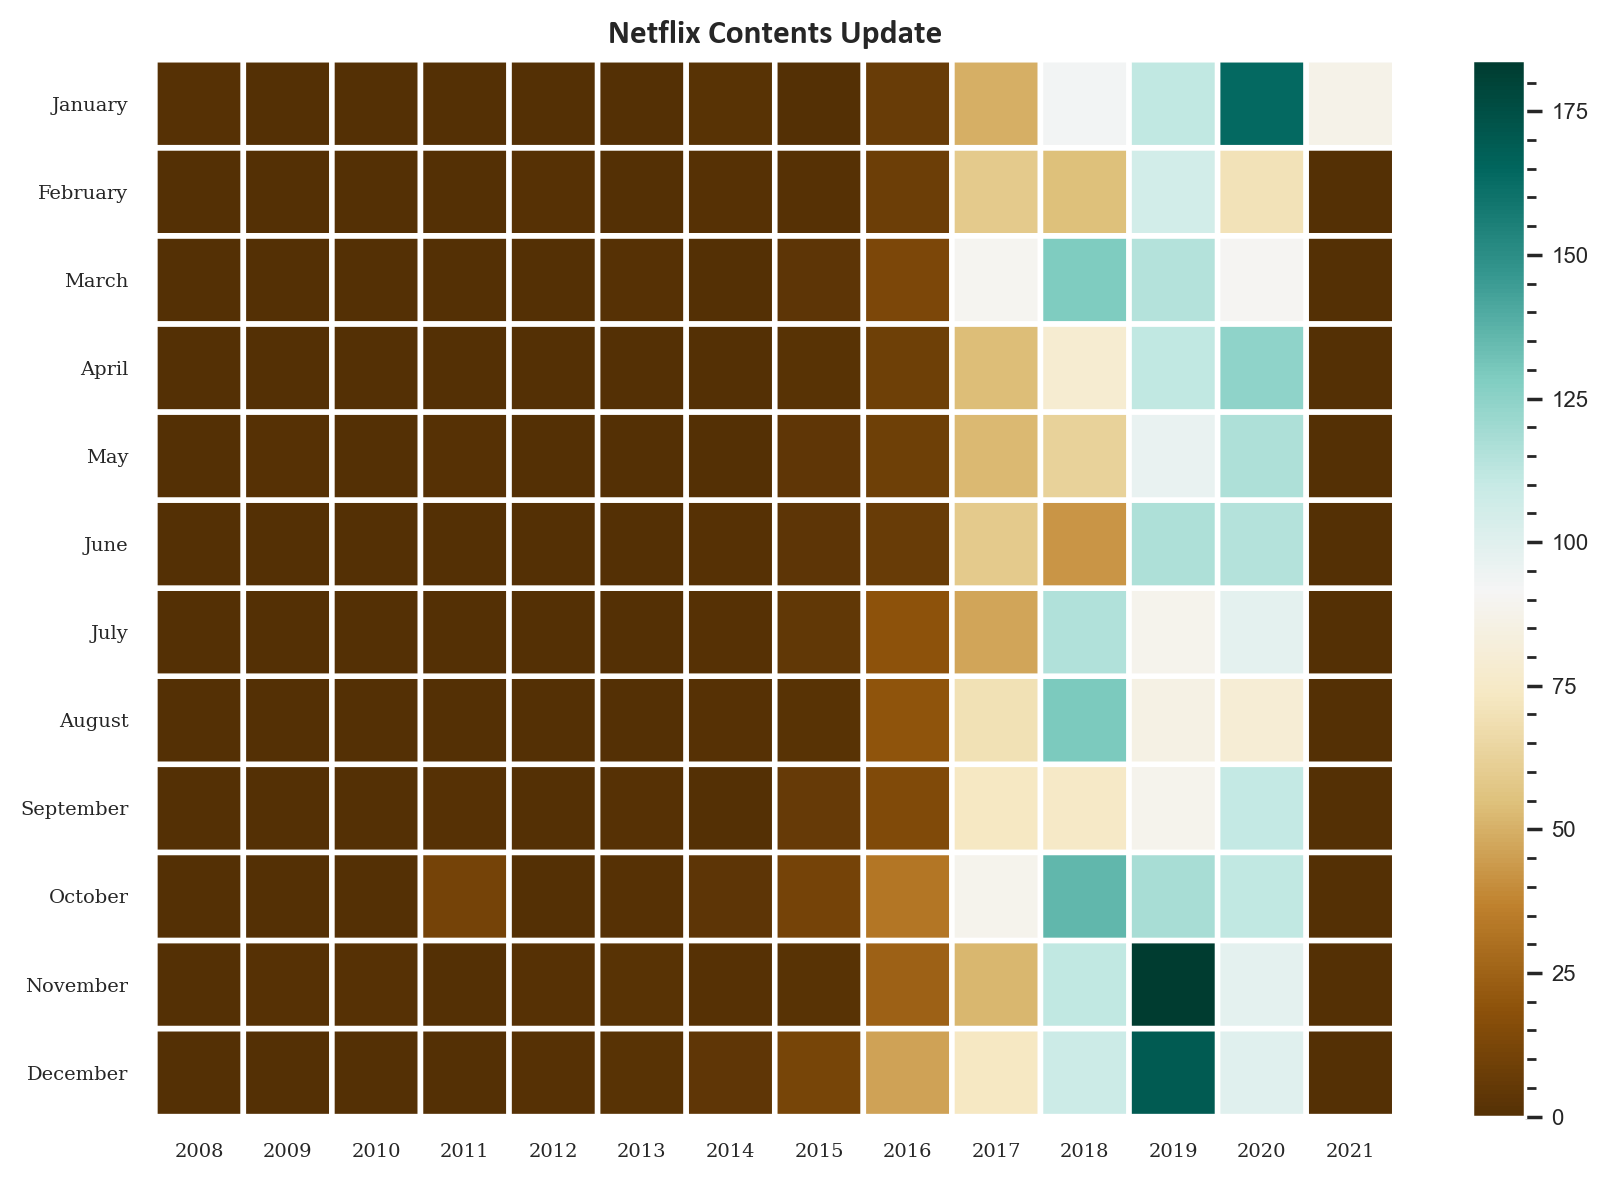

In [41]:
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df_copy, cmap='BrBG', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df_copy.columns), 1), df_copy.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df_copy.index), 1), df_copy.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold')
cbar = plt.colorbar()
cbar.solids.set_edgecolor("face")

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

In [42]:
df['description'].head()

1    After a devastating earthquake hits Mexico Cit...
2    When an army recruit is found dead, his fellow...
3    In a postapocalyptic world, rag-doll robots hi...
4    A brilliant group of students become card-coun...
5    A genetics professor experiments with a treatm...
Name: description, dtype: object

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

In [44]:

df['description'] = df['description'].fillna('')


tfidf_matrix = tfidf.fit_transform(df['description'])

tfidf_matrix.shape

(4979, 13910)

In [45]:

from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
from lib.utils import *
ac=[]

In [46]:
from sklearn.decomposition import NMF
model = NMF(n_components=2, init='random', random_state=0)
W = model.fit_transform(tfidf_matrix, tfidf_matrix)
H = model.components_
ac.append(accuracy_score(W,tfidf_matrix,sample_weight=0.2)*100)

In [47]:
X,y=extract_feature(tfidf_matrix)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [48]:
from sklearn.cluster import KMeans
clf= KMeans(n_clusters=2, random_state=0)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
ac.append(accuracy_score(y_pred,y_test,sample_weight=0.4)*100)

In [49]:

indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [50]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

   
    sim_scores = list(enumerate(cosine_sim[idx]))

    
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    
    sim_scores = sim_scores[1:11]

    
    movie_indices = [i[0] for i in sim_scores]

   
    return df['title'].iloc[movie_indices]

In [51]:
get_recommendations('#realityhigh')

4427    Natural Selection
4137           Miss India
6156      The Book of Sun
4989           Prom Night
6341     The F**k-It List
765                Battle
1145              Burning
7326             Uncorked
7662              Work It
5242            Rock On!!
Name: title, dtype: object

In [52]:
get_recommendations('PK')

133                                7 años
4803                               Payday
3478                    Kyaa Kool Hai Hum
1243                    Catching Feelings
3940    Mariah Carey's Merriest Christmas
2154                                Fifty
3703                                 Loev
1269                              Chameli
3576         LEGENDS OF THE HIDDEN TEMPLE
7754                                 Yuva
Name: title, dtype: object

the accuracy of Matrix Factorization is 97.87 and Kmeans is 95.3


(50.0, 100.0)

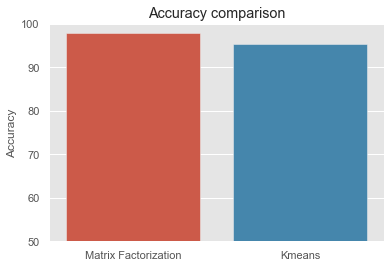

In [53]:
import numpy as np
import seaborn as sns
import matplotlib as plt

plt.style.use('ggplot')
x=['Matrix Factorization','Kmeans']
 
ax=sns.barplot(x,ac[:2])
ax.set_title('Accuracy comparison')
ax.set_ylabel('Accuracy')
#ax.yaxis.set_major_locator(ticker.LinearLocator())
print("the accuracy of {} is {} and {} is {}".format(x[0],ac[0],x[1],ac[1]))
ax.set_ylim(50,100)